# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [9]:
index = 0
for entry in app_train.columns:
    print(f'The {index} entry is {entry}. The dtype is {app_train[entry].dtype}')
    index+=1

The 0 entry is SK_ID_CURR. The dtype is int64
The 1 entry is TARGET. The dtype is int64
The 2 entry is NAME_CONTRACT_TYPE. The dtype is object
The 3 entry is CODE_GENDER. The dtype is object
The 4 entry is FLAG_OWN_CAR. The dtype is object
The 5 entry is FLAG_OWN_REALTY. The dtype is object
The 6 entry is CNT_CHILDREN. The dtype is int64
The 7 entry is AMT_INCOME_TOTAL. The dtype is float64
The 8 entry is AMT_CREDIT. The dtype is float64
The 9 entry is AMT_ANNUITY. The dtype is float64
The 10 entry is AMT_GOODS_PRICE. The dtype is float64
The 11 entry is NAME_TYPE_SUITE. The dtype is object
The 12 entry is NAME_INCOME_TYPE. The dtype is object
The 13 entry is NAME_EDUCATION_TYPE. The dtype is object
The 14 entry is NAME_FAMILY_STATUS. The dtype is object
The 15 entry is NAME_HOUSING_TYPE. The dtype is object
The 16 entry is REGION_POPULATION_RELATIVE. The dtype is float64
The 17 entry is DAYS_BIRTH. The dtype is int64
The 18 entry is DAYS_EMPLOYED. The dtype is int64
The 19 entry is DA

In [17]:
app_train.groupby('CNT_CHILDREN').size()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
dtype: int64

In [19]:
app_train.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

(array([12.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000e+00, 2.15380e+04, 4.30750e+04, 6.46120e+04, 8.61490e+04,
        1.07686e+05, 1.29223e+05, 1.50760e+05, 1.72297e+05, 1.93834e+05,
        2.15371e+05]),
 <a list of 10 Patch objects>)

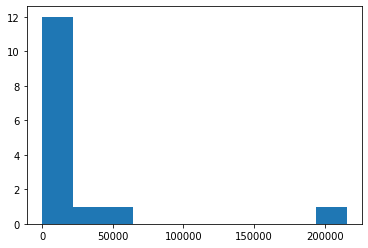

In [40]:
df_children = app_train.groupby('CNT_CHILDREN').size().reset_index()
#print(df_childer)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_children.iloc[:,1])

In [26]:
df= app_train.groupby('AMT_INCOME_TOTAL').size().reset_index()
df.columns = ['AMT_INCOME_TOTAL', 'Count']

In [29]:
df[df.Count >500]

,AMT_INCOME_TOTAL,Count
126,45000.0,2043
168,49500.0,738
213,54000.0,2319
252,58500.0,1182
292,63000.0,1145
338,67500.0,11147
387,72000.0,2187
440,76500.0,3146
506,81000.0,6001
553,85500.0,1514


In [34]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [37]:
maxincome = app_train['AMT_INCOME_TOTAL'].idxmax()
app_train.iloc[maxincome]

SK_ID_CURR                        114967
TARGET                                 1
NAME_CONTRACT_TYPE            Cash loans
CODE_GENDER                            F
FLAG_OWN_CAR                           N
                                 ...    
AMT_REQ_CREDIT_BUREAU_DAY              0
AMT_REQ_CREDIT_BUREAU_WEEK             0
AMT_REQ_CREDIT_BUREAU_MON              0
AMT_REQ_CREDIT_BUREAU_QRT              0
AMT_REQ_CREDIT_BUREAU_YEAR             1
Name: 12840, Length: 122, dtype: object